In [1]:
!pip install opendatasets
!pip install pandas

     ---------------------------------------- 0.0/82.1 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.1 kB ? eta -:--:--
     ------------------ ------------------- 41.0/82.1 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 82.1/82.1 kB 772.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.14-py3-none-any.whl size=105130 sha256=1501250a9f42a8d24e2df64554366a16b2d8a2ec78504bb17601b20f4dbed34b
  Stored in directory: c:\users\amrut\appdata\local\pip\cache\wheels\ec\d9\04\93be57edf3835182a8e76d8ff87f7e77a0113f473ba3721ee0
Successfully built kaggle


In [ ]:
#The below code is being used for downloading the data set directly from kaggle

In [2]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered") #f71ee8768a1e

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  amrutha surabhi


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered


100%|██████████| 427M/427M [00:27<00:00, 16.0MB/s] 


In [ ]:
# This Python code sets up for training a convolutional neural network (CNN) for image classification. It imports libraries for image manipulation (OpenCV, PIL), data handling (pandas), deep learning (TensorFlow, Keras), visualization (Matplotlib, Seaborn, Plotly), and model evaluation (scikit-learn). The code likely splits data into training and testing sets, builds a CNN model with convolutional and dense layers, trains the model with metrics like accuracy, and evaluates its performance using classification reports. Suppressing warnings with warnings.filterwarnings is included but generally discouraged.

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import PIL
import plotly
import plotly.express as px

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Input,ZeroPadding2D,BatchNormalization,Activation
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
from tensorflow.keras.layers.experimental import preprocessing

from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'tensorflow.keras.layers.experimental'

In [ ]:
#Locate the file in Personal Machine
path = 'C:\\Users\\amrut\\OneDrive\\Desktop\\miniproj\\gaussian_filtered_images'


In [6]:
!pip install --upgrade tensorflow



   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/385.0 MB 3.3 MB/s eta 0:01:57
   ---------------------------------------- 1.4/385.0 MB 12.9 MB/s eta 0:00:30
   ---------------------------------------- 2.3/385.0 MB 14.6 MB/s eta 0:00:27
   ---------------------------------------- 3.1/385.0 MB 15.4 MB/s eta 0:00:25
   ---------------------------------------- 4.0/385.0 MB 15.9 MB/s eta 0:00:25
    --------------------------------------- 4.9/385.0 MB 16.4 MB/s eta 0:00:24
    --------------------------------------- 5.2/385.0 MB 15.2 MB/s eta 0:00:25
    --------------------------------------- 6.4/385.0 MB 16.4 MB/s eta 0:00:24
    --------------------------------------- 7.3/385.0 MB 16.6 MB/s eta 0:00:23
    --------------------------------------- 8.3/385.0 MB 16.6 MB/s eta 0:00:23
    --------------------------------------- 9.2/385.0 MB 16.8 MB/s et

  You can safely remove it manually.


In [17]:
No_DR_Img = os.listdir(path + '/No_DR/')
Mild_Img = os.listdir(path + '/Mild/')
Moderate_Img = os.listdir(path + '/Moderate/')
Proliferate_DR_Img = os.listdir(path + '/Proliferate_DR/')
Severe_Img = os.listdir(path + '/Severe/')

In [ ]:
#The below codes displays four retinal images (without Diabetic Retinopathy) from a folder using OpenCV to load and Matplotlib to display them in a grid format with a title.

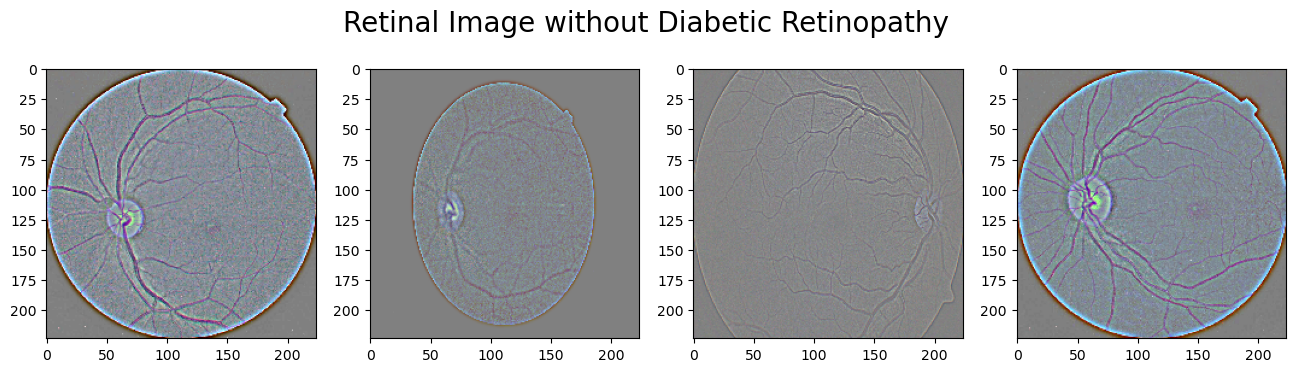

In [18]:
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/No_DR/'+ No_DR_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image without Diabetic Retinopathy",fontsize=20)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

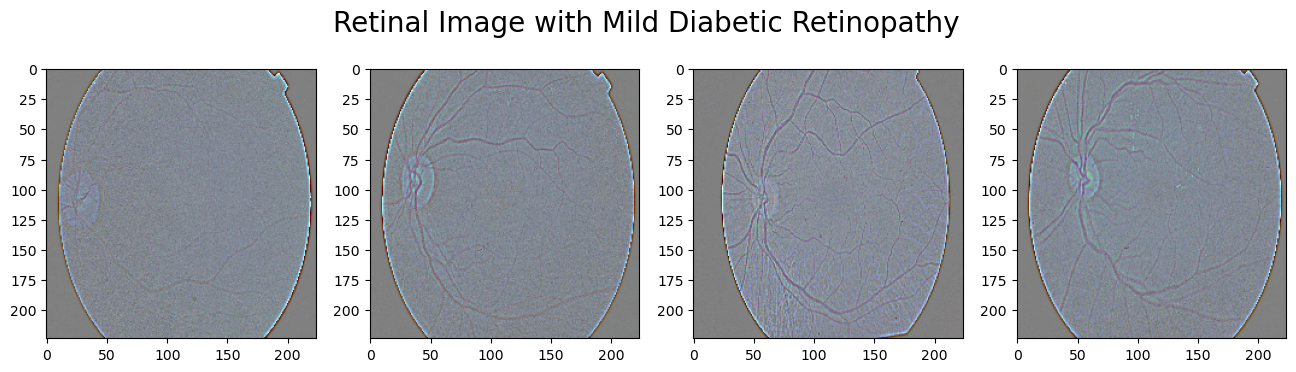

In [19]:
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Mild/'+ Mild_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Mild Diabetic Retinopathy",fontsize=20)
plt.show

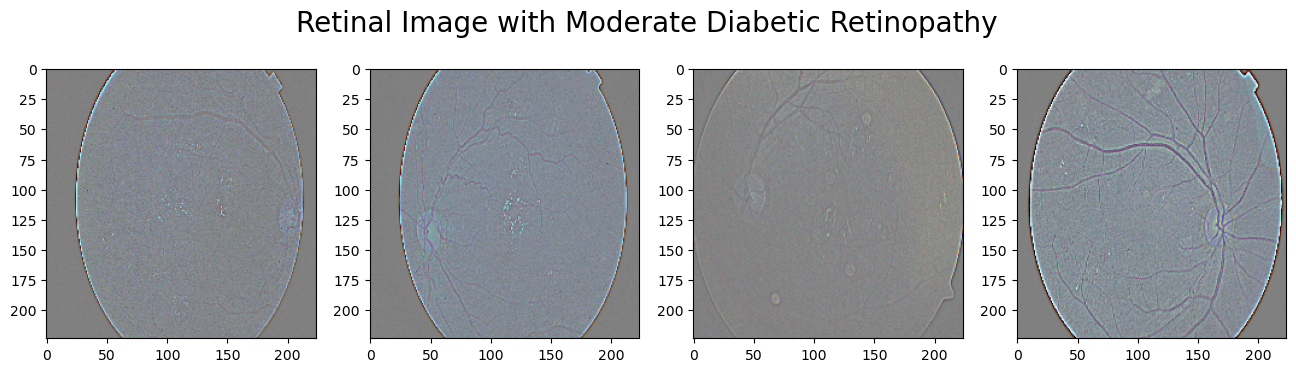

In [20]:
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Moderate/'+ Moderate_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Moderate Diabetic Retinopathy",fontsize=20)
plt.show()

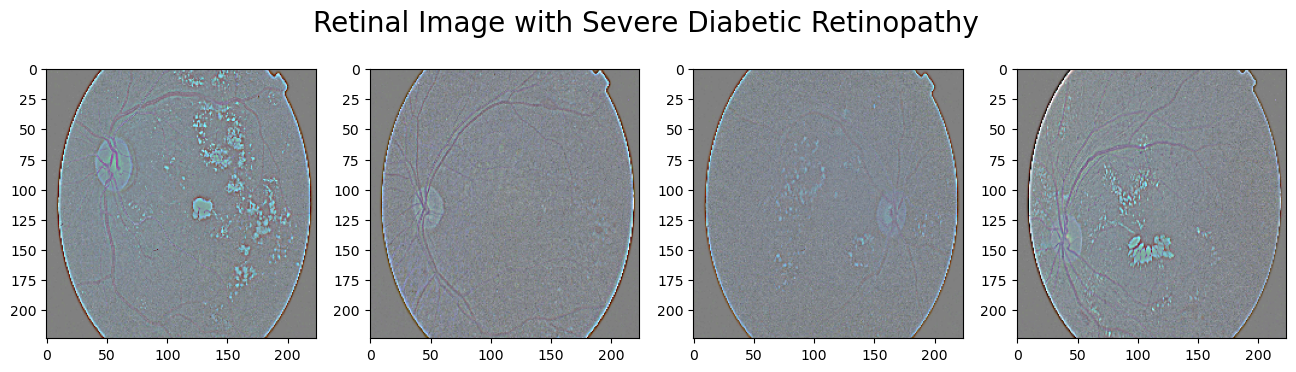

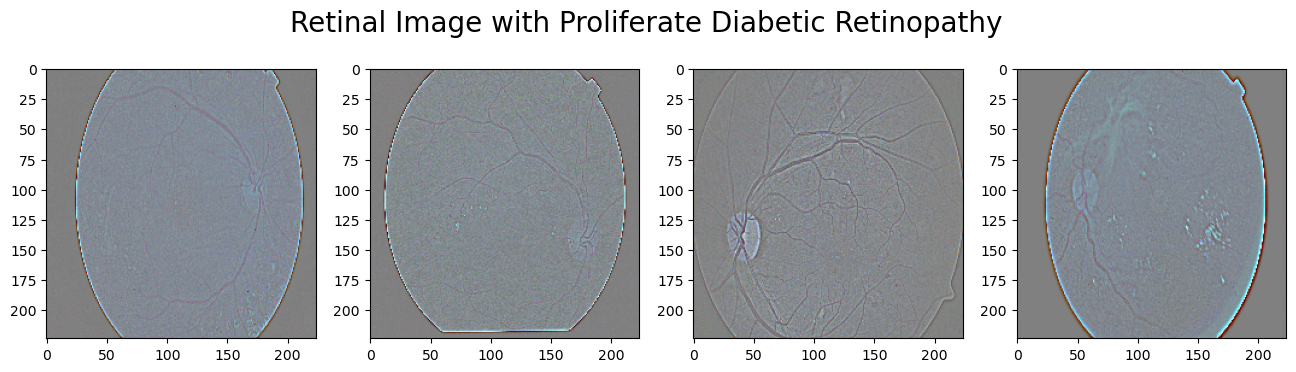

In [21]:

fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Severe/'+ Severe_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Severe Diabetic Retinopathy",fontsize=20)
plt.show()
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Proliferate_DR/'+ Proliferate_DR_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Proliferate Diabetic Retinopathy",fontsize=20)
plt.show()

In [35]:
import os

# Path to the dataset
dataset_path = r"C:\Users\amrut\OneDrive\Desktop\miniproj\gaussian_filtered_images"

# List the contents of the dataset directory
try:
    dataset_contents = os.listdir(dataset_path)
    print(dataset_contents)
except FileNotFoundError as e:
    print(e)


['export.pkl', 'Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']


In [13]:
!pip install tkinter

ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter


In [1]:
!pip install numpy scikit-learn opencv-python


In [ ]:
#THIS CODE IS FOR SVM CLASSIFICATION FOR THE GAUSSIAN DATA SET


In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Directory paths
dataset_dir = 'C:\\Users\\amrut\\OneDrive\\Desktop\\miniproj\\gaussian_filtered_images'
classes = ['No_DR', 'Mild', 'Moderate', 'Severe','Proliferate_DR']

# Image size (resize all images to this size)
img_size = (128, 128)

def load_images(dataset_dir, classes, img_size):
    images = []
    labels = []
    for cls in classes:
        cls_dir = os.path.join(dataset_dir, cls)
        for filename in os.listdir(cls_dir):
            img_path = os.path.join(cls_dir, filename)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            if img is not None:
                img = cv2.resize(img, img_size)
                images.append(img)
                labels.append(cls)
    return np.array(images), np.array(labels)


images, labels = load_images(dataset_dir, classes, img_size)

# Normalize images
images = images / 255.0

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Flatten images for SVM input
n_samples, img_width, img_height, img_channels = images.shape
X = images.reshape((n_samples, img_width * img_height * img_channels))

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels_encoded, test_size=0.2, random_state=42)

# Print dataset shapes
print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Testing set shape: {X_test.shape}, {y_test.shape}')


Training set shape: (2929, 49152), (2929,)
Testing set shape: (733, 49152), (733,)


In [ ]:
#implementing svm model  and training model

In [3]:

svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=classes)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.772169167803547
Classification Report:
                precision    recall  f1-score   support

         No_DR       0.44      0.51      0.47        69
          Mild       0.66      0.76      0.70       201
      Moderate       0.93      0.97      0.95       367
        Severe       0.60      0.18      0.28        65
Proliferate_DR       0.50      0.32      0.39        31

      accuracy                           0.77       733
     macro avg       0.63      0.55      0.56       733
  weighted avg       0.76      0.77      0.76       733



In [ ]:
#the below code is used for saving the model,predcting and evaluating


In [5]:
import joblib


model_path = 'svm_diabetic_retinopathy_model.joblib'
joblib.dump(svm_classifier, model_path)
print(f'Model saved to {model_path}')

svm_classifier_loaded = joblib.load(model_path)


y_pred_loaded = svm_classifier_loaded.predict(X_test)

accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f'Loaded model accuracy: {accuracy_loaded}')


Model saved to svm_diabetic_retinopathy_model.joblib
Loaded model accuracy: 0.772169167803547


In [ ]:
#implementing KNN ,training the data and evaluating

In [9]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

dataset_dir = 'C:\\Users\\amrut\\OneDrive\\Desktop\\miniproj\\gaussian_filtered_images'
classes = ['No_DR', 'Mild', 'Moderate', 'Severe','Proliferate_DR']

# Image size (resize all images to this size)
img_size = (128, 128)

# Load and preprocess images
def load_images(dataset_dir, classes, img_size):
    images = []
    labels = []
    for cls in classes:
        cls_dir = os.path.join(dataset_dir, cls)
        for filename in os.listdir(cls_dir):
            img_path = os.path.join(cls_dir, filename)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            if img is not None:
                img = cv2.resize(img, img_size)
                images.append(img)
                labels.append(cls)
    return np.array(images), np.array(labels)

images, labels = load_images(dataset_dir, classes, img_size)

# Normalize images
images = images / 255.0

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
# Flatten images for KNN
flattened_images = images.reshape(images.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(flattened_images, labels, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.7107776261937244
                precision    recall  f1-score   support

          Mild       0.34      0.62      0.44        69
      Moderate       0.59      0.61      0.60       201
         No_DR       0.92      0.93      0.93       367
Proliferate_DR       0.35      0.09      0.15        65
        Severe       0.58      0.23      0.33        31

      accuracy                           0.71       733
     macro avg       0.56      0.50      0.49       733
  weighted avg       0.71      0.71      0.70       733

